In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt

In [3]:
def moving_average(d, extra_periods = 1, n=3):
    #historical period length
    cols = len(d)
    #append np.nan into the demand array to cover future periods
    d = np.append(d,[np.nan]*extra_periods)
    #define the forecast array
    f = np.full(cols+extra_periods, np.nan)

    #create all the t+1 forecast untill end of historical period
    for t in range(n, cols):
        f[t] = np.mean(d[t-n:t])

    #forecast for all extra periods
    f[t+1:] = np.mean(d[t-n+1:t+1])

    #return a dataframe with the demand, forecast, and error
    df = pd.DataFrame.from_dict({'Demand':d, 'Forecast': f, 'Error': d-f})
    return(df)


In [52]:

#d = [28,19,18,13,19,16,19,18,13,16,16,11,18,15,13,15,13,11,13,19,12]
d = [37,60,85,112,132,145,179,198,150,132]
data = moving_average(d, extra_periods=1)
data


,Demand,Forecast,Error
0,37.0,NaN,NaN
1,60.0,NaN,NaN
2,85.0,NaN,NaN
3,112.0,60.666667,51.333333
4,132.0,85.666667,46.333333
5,145.0,109.666667,35.333333
6,179.0,129.666667,49.333333
7,198.0,152.000000,46.000000
8,150.0,174.000000,-24.000000
9,132.0,175.666667,-43.666667


<AxesSubplot:title={'center':'Moving Average'}>

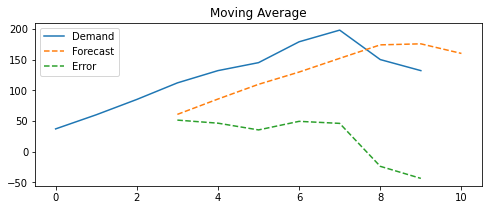

In [53]:
data[['Demand','Forecast','Error']].plot(figsize=(8,3), title = 'Moving Average', style = ['-','--','--'])

In [63]:
def kpi(df):
    dem_ave = df.loc[df['Error'].notnull(), 'Demand'].mean()
    bias_abs = df['Error'].mean()
    bias_rel = bias_abs / dem_ave
    print('Bias: {:0.2f}, {:.2%}'.format(bias_abs, bias_rel))
    MAPE = (df['Error'].abs() / df['Demand']).mean()
    print('MAPE: {:0.2%}'.format(MAPE))
    MAE_absolute = df['Error'].abs().mean()
    MAE_scaled = MAE_absolute / (data[data['Error'].notnull()]['Demand'].mean())
    print('MAE: {:0.2f}, {:0.2%}'.format(MAE_absolute,MAE_scaled))
    RMSE_absolute = (df['Error']**2).mean()**0.5
    RMSE_scaled =  RMSE_absolute / df[df['Error'].notnull()]['Demand'].mean()
    print('RMSE: {:0.2f}, {:0.2%}'.format(RMSE_absolute,RMSE_scaled))

    

In [64]:
kpi(data)

Bias: 22.95, 15.33%
MAPE: 29.31%
MAE: 42.29, 28.24%
RMSE: 43.20, 28.85%


In [60]:
(data['Error']**2).mean()**0.5

43.198691926110264

In [58]:
data[data['Error'].notnull()]['Demand'].mean()

149.71428571428572

In [ ]:
(df['Error']**2).mean()**0.5 / df[df['Error'].notnull()]['Demand'].mean()